In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data1 = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Looking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Dropping null values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
# Dropping id column , because it is not relevant
data = data.drop(['id'], axis = 1)
# Removing rows with values other than "Male" and "Female" in the 'gender' column
data = data[data['gender'].isin(['Male', 'Female'])]

# Changing 1 - (Male, Yes, Urban), 0 - (Female, No, Rural)
for column in data.columns:
    if "Male" in data[column].values or "Female" in data[column].values:
        data[column] = data[column].map({"Male": 1, "Female": 0})
    if "Yes" in data[column].values or "No" in data[column].values:
        data[column] = data[column].map({"Yes": 1, "No": 0})
    if "Urban" in data[column].values or "Rural" in data[column].values:
        data[column] = data[column].map({"Urban": 1, "Rural": 0})

#Replacing and droping the work_type column
data = data.join(pd.get_dummies(data.work_type)).drop(['work_type'], axis=1)
data = data.join(pd.get_dummies(data.smoking_status)).drop(['smoking_status'], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   Residence_type     4908 non-null   int64  
 6   avg_glucose_level  4908 non-null   float64
 7   bmi                4908 non-null   float64
 8   stroke             4908 non-null   int64  
 9   Govt_job           4908 non-null   bool   
 10  Never_worked       4908 non-null   bool   
 11  Private            4908 non-null   bool   
 12  Self-employed      4908 non-null   bool   
 13  children           4908 non-null   bool   
 14  Unknown            4908 non-null   bool   
 15  formerly smoked    4908 non-null   bool   
 16  never smoked       4908 non-n

In [9]:
# Preparing second datatset 

# Dropping id column , because it is not relevant
data1 = data1.drop(['id'], axis = 1)

# Removing rows with values other than "Male" and "Female" in the 'gender' column
data1 = data1[data1['gender'].isin(['Male', 'Female'])]

# Changing 1 - (Male, Yes, Urban), 0 - (Female, No, Rural)
for column in data1.columns:
    if "Male" in data1[column].values or "Female" in data1[column].values:
        data1[column] = data1[column].map({"Male": 1, "Female": 0})
    if "Yes" in data1[column].values or "No" in data1[column].values:
        data1[column] = data1[column].map({"Yes": 1, "No": 0})
    if "Urban" in data1[column].values or "Rural" in data1[column].values:
        data1[column] = data1[column].map({"Urban": 1, "Rural": 0})

data1 = pd.DataFrame(data1)


column_with_missing_values = 8
missing_column = data1.iloc[:, column_with_missing_values]
print("Before Imputation - Shape:", data1.shape)
imputer = KNNImputer(n_neighbors=2)
missing_column_2d = missing_column.values.reshape(-1, 1)
imputed_column_2d = imputer.fit_transform(missing_column_2d)
data1.iloc[:, column_with_missing_values] = imputed_column_2d.flatten()
print("After Imputation - Shape:", data1.shape)

data1.info()

Before Imputation - Shape: (5109, 11)
After Imputation - Shape: (5109, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 479.0+ KB


In [10]:
#Replacing and droping the work_type column
data1 = data1.join(pd.get_dummies(data1.work_type)).drop(['work_type'], axis=1)
data1 = data1.join(pd.get_dummies(data1.smoking_status)).drop(['smoking_status'], axis=1)

In [11]:
data1

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.60000,1,False,False,True,False,False,False,True,False,False
1,0,61.0,0,0,1,0,202.21,28.89456,1,False,False,False,True,False,False,False,True,False
2,1,80.0,0,1,1,0,105.92,32.50000,1,False,False,True,False,False,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.40000,1,False,False,True,False,False,False,False,False,True
4,0,79.0,1,0,1,0,174.12,24.00000,1,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.89456,0,False,False,True,False,False,False,False,True,False
5106,0,81.0,0,0,1,1,125.20,40.00000,0,False,False,False,True,False,False,False,True,False
5107,0,35.0,0,0,1,0,82.99,30.60000,0,False,False,False,True,False,False,False,True,False
5108,1,51.0,0,0,1,0,166.29,25.60000,0,False,False,True,False,False,False,True,False,False


In [12]:
# Splitting to train and test data
from sklearn.model_selection import train_test_split

x = data.drop(['stroke'], axis=1)
y = data['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
# Splitting to train and test data
from sklearn.model_selection import train_test_split

x1 = data1.drop(['stroke'], axis=1)
y1 = data1['stroke']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >]], dtype=object)

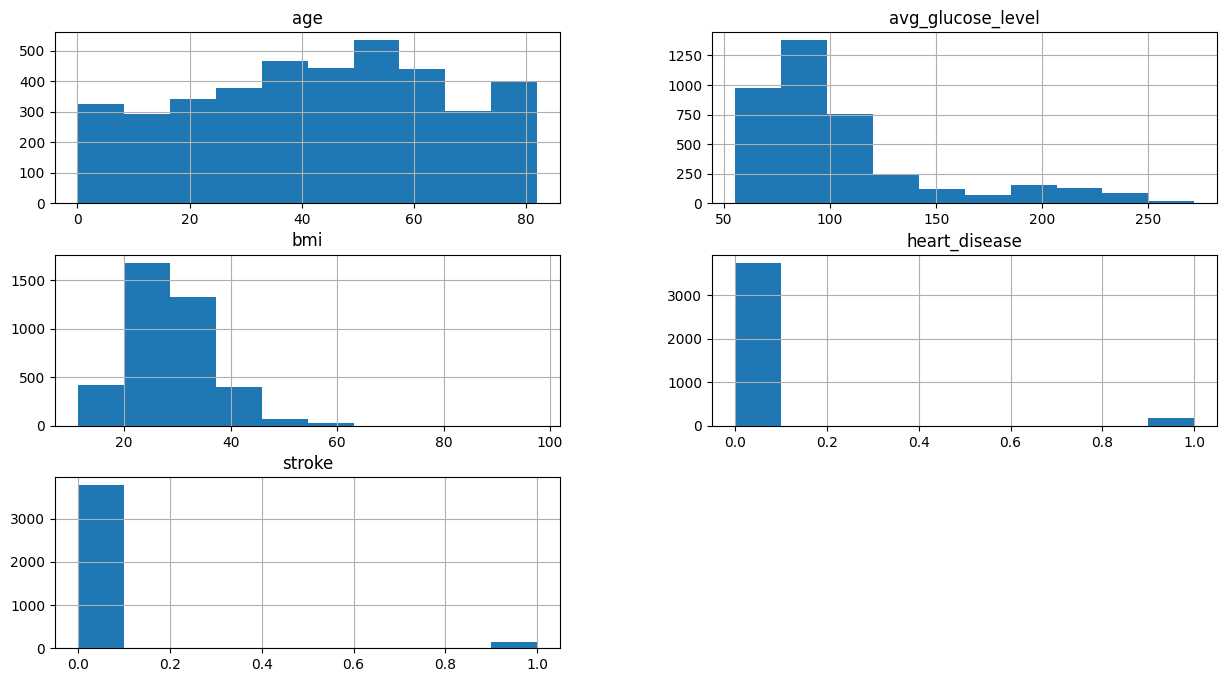

In [15]:
# Making histograms
train_data = x_train.join(y_train)
histogram_columns = ['age', 'avg_glucose_level', 'bmi', 'heart_disease', 'stroke']
train_data[histogram_columns].hist(figsize=(15,8))

In [16]:
""" As we can see there are a a distribution with 50 as the most frequent age, as well as 90 as avg_glucose_level, which is normal. In addition we can 
    see that there a very few times with heart_disease and stroke positive"""

' As we can see there are a a distribution with 50 as the most frequent age, as well as 90 as avg_glucose_level, which is normal. In addition we can \n    see that there a very few times with heart_disease and stroke positive'

<Axes: >

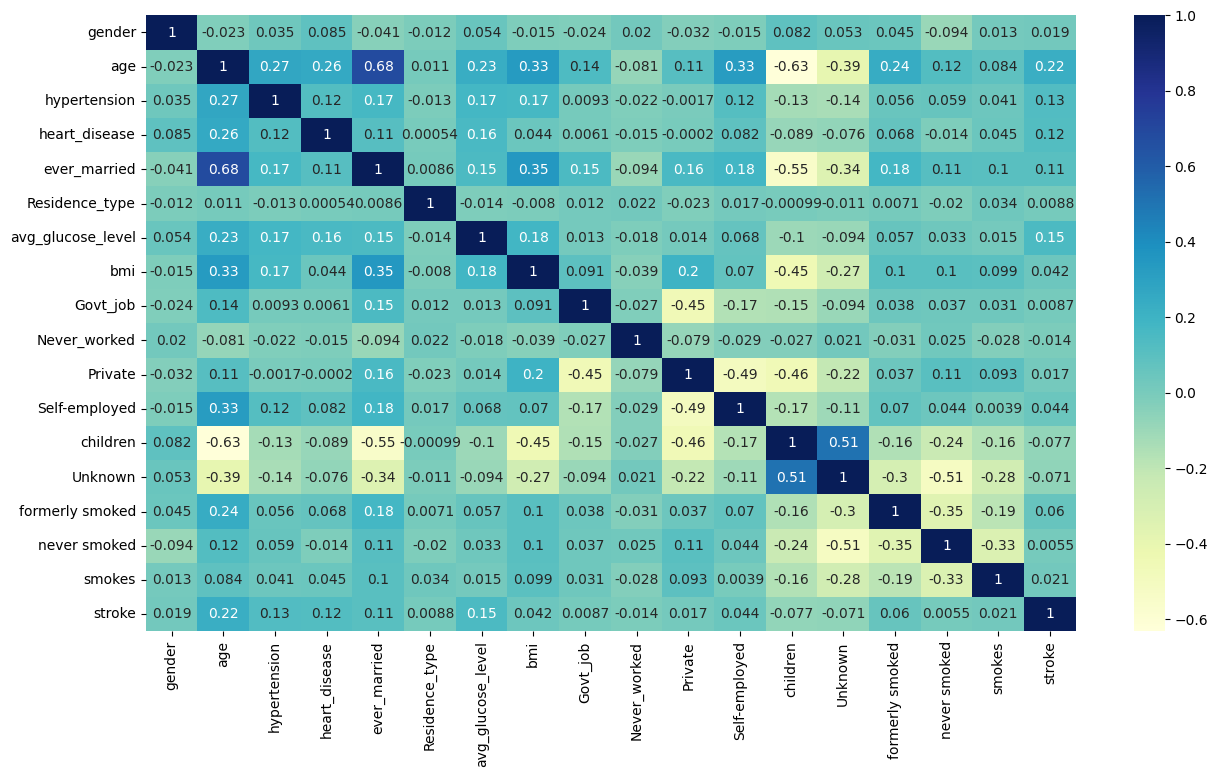

In [17]:
# Making histograms
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
""" In our correlation map we can observe that there is a positive correlation between age, hypertension, heart_disease and ever_married , while on
    children and unknown we got a negative small corelation"""

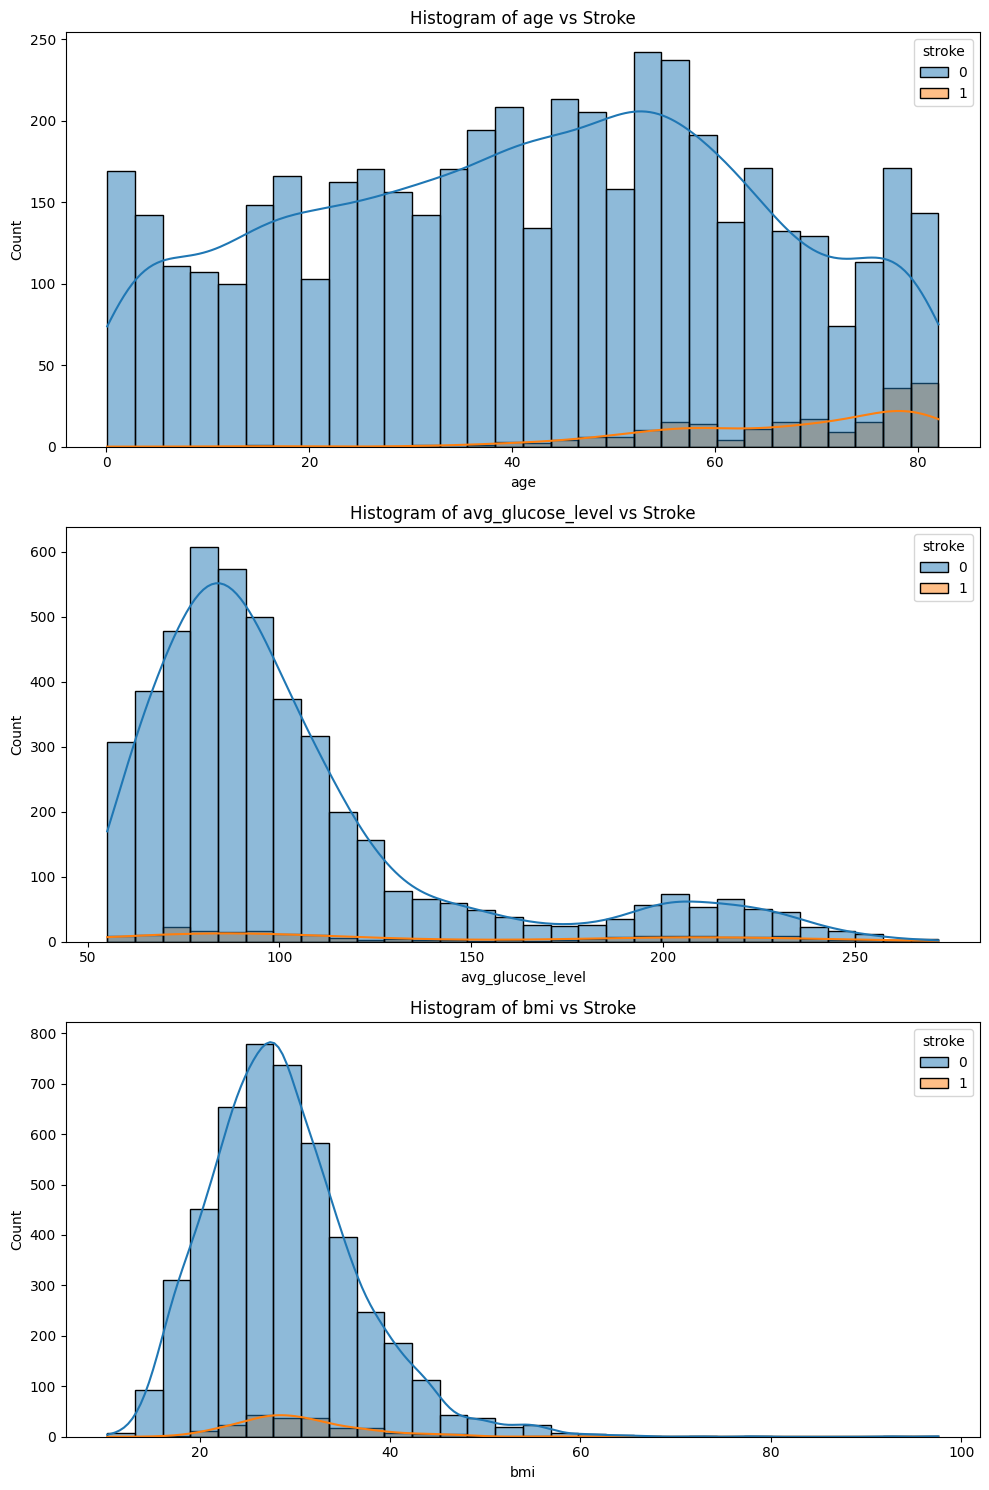

In [40]:
# Making plots
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10,5*len(numerical_columns)))
for col,ax in zip(numerical_columns, axes):
    sns.histplot(x=col, hue='stroke', data=data, kde=True, ax=ax, bins=30)
    ax.set_title(f'Histogram of {col} vs Stroke')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

In [ ]:
""" After these plots we can observe that as bigger age is, as there is a higher possibility of stroke, same thing is with avg_glucose_level
    and bmi, which is logical assumption"""

In [18]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Training the model
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# Use the model to predict probabilities on the test set
y_pred_prob = logistic_regression.predict_proba(x_test)[:, 1]
# Set a custom threshold
custom_threshold = 0.15
# Make predictions based on the custom threshold
y_pred_adjusted = (y_pred_prob > custom_threshold).astype(int)

# Calculate metrics
accuracy_logistic = accuracy_score(y_test, y_pred_adjusted)
precision_logistic = precision_score(y_test, y_pred_adjusted, zero_division=1)
recall_logistic = recall_score(y_test, y_pred_adjusted, zero_division=1)
f1_logistic = f1_score(y_test, y_pred_adjusted, zero_division=1)

# Print metrics
print(f"Metrics for Logistic Regression on Test Set:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")
print(f"F1 Score: {f1_logistic:.2f}")



# Training the KNNI model
logistic_regression = LogisticRegression()
logistic_regression.fit(x1_train, y1_train)

# Use the model to predict probabilities on the test set
y1_pred_prob = logistic_regression.predict_proba(x1_test)[:, 1]
# Set a custom threshold
custom_threshold = 0.15
# Make predictions based on the custom threshold
y1_pred_adjusted = (y1_pred_prob > custom_threshold).astype(int)

# Calculate metrics on KNNI dataset
accuracy1_logistic_KNNI = accuracy_score(y1_test, y1_pred_adjusted)
precision1_logistic_KNNI = precision_score(y1_test, y1_pred_adjusted, zero_division=1)
recall1_logistic_KNNI = recall_score(y1_test, y1_pred_adjusted, zero_division=1)
f1_1_logistic_KNNI = f1_score(y1_test, y1_pred_adjusted, zero_division=1)

# Print metrics on KNNI dataset
print("\nMetrics for Logistic Regression on KNNI dataset:")
print(f"Accuracy: {accuracy1_logistic_KNNI:.2f}")
print(f"Precision: {precision1_logistic_KNNI:.2f}")
print(f"Recall: {recall1_logistic_KNNI:.2f}")
print(f"F1 Score: {f1_1_logistic_KNNI:.2f}")


Metrics for Logistic Regression on Test Set:
Accuracy: 0.91
Precision: 0.18
Recall: 0.21
F1 Score: 0.19

Metrics for Logistic Regression on KNNI dataset:
Accuracy: 0.90
Precision: 0.26
Recall: 0.37
F1 Score: 0.30


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier
clf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 50, 100], 
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from the grid search to predict on the test set with adjusted threshold
y_pred_prob = grid_search.predict_proba(x_test)[:, 1]
threshold = 0.15  
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Calculate metrics
accuracy_RandomForest = accuracy_score(y_test, y_pred_adjusted)
precision_RandomForest = precision_score(y_test, y_pred_adjusted, zero_division=1)  # Set zero_division to 1
recall_RandomForest = recall_score(y_test, y_pred_adjusted)
f1_RandomForest = f1_score(y_test, y_pred_adjusted)

# Model Metrics
print(f"Accuracy on Test Set: {accuracy_RandomForest:.2f}")
print(f"Precision on Test Set: {precision_RandomForest:.2f}")
print(f"Recall on Test Set: {recall_RandomForest:.2f}")
print(f"F1 Score on Test Set: {f1_RandomForest:.2f}")


# Create RandomForestClassifier for KNNI
clf_knni = RandomForestClassifier()

# Define the parameter grid to search for KNNI
param_grid_knni = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 50, 100],
}

# Create a GridSearchCV instance for KNNI
grid_search_knni = GridSearchCV(clf_knni, param_grid_knni, cv=3, scoring='accuracy')
grid_search_knni.fit(x1_train, y1_train)

# Get the best hyperparameters from the grid search for KNNI
best_params_knni = grid_search_knni.best_params_
print("Best Hyperparameters for KNNI:", best_params_knni)

# Use the best model from the grid search for KNNI to predict on the test set with adjusted threshold
y_pred_prob_knni = grid_search_knni.predict_proba(x1_test)[:, 1]
threshold_knni = 0.15  
y_pred_adjusted_knni = (y_pred_prob_knni > threshold_knni).astype(int)

# Calculate metrics for KNNI
accuracy_RandomForest_KNNI = accuracy_score(y1_test, y_pred_adjusted_knni)
precision_RandomForest_KNNI = precision_score(y1_test, y_pred_adjusted_knni)
recall_RandomForest_KNNI = recall_score(y1_test, y_pred_adjusted_knni)
f1_RandomForest_KNNI = f1_score(y1_test, y_pred_adjusted_knni)

# Model Metrics for KNNI
print(f"Accuracy on KNNI Test Set: {accuracy_RandomForest_KNNI:.2f}")
print(f"Precision on KNNI Test Set: {precision_RandomForest_KNNI:.2f}")
print(f"Recall on KNNI Test Set: {recall_RandomForest_KNNI:.2f}")
print(f"F1 Score on KNNI Test Set: {f1_RandomForest_KNNI:.2f}")

Best Hyperparameters: {'max_depth': None, 'n_estimators': 50}
Accuracy on Test Set: 0.88
Precision on Test Set: 0.14
Recall on Test Set: 0.26
F1 Score on Test Set: 0.19
Best Hyperparameters for KNNI: {'max_depth': 100, 'n_estimators': 150}
Accuracy on KNNI Test Set: 0.87
Precision on KNNI Test Set: 0.22
Recall on KNNI Test Set: 0.40
F1 Score on KNNI Test Set: 0.28


In [72]:
import xgboost as xgb

# Create an XGBoost classifier
clf = xgb.XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from the grid search to predict on the test set with adjusted threshold
y_pred_prob = grid_search.predict_proba(x_test)[:, 1]
threshold = 0.15
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Calculate metrics
accuracy_XGBoost = accuracy_score(y_test, y_pred_adjusted)
precision_XGBoost = precision_score(y_test, y_pred_adjusted, zero_division=1)
recall_XGBoost = recall_score(y_test, y_pred_adjusted)
f1_XGBoost = f1_score(y_test, y_pred_adjusted)

# Model Metrics
print(f"Accuracy on Test Set: {accuracy_XGBoost:.2f}")
print(f"Precision on Test Set: {precision_XGBoost:.2f}")
print(f"Recall on Test Set: {recall_XGBoost:.2f}")
print(f"F1 Score on Test Set: {f1_XGBoost:.2f}")


# Create XGBoost classifier for KNNI
clf_knni = xgb.XGBClassifier()

# Define the parameter grid to search for KNNI
param_grid_knni = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
}

# Create a GridSearchCV instance for KNNI
grid_search_knni = GridSearchCV(clf_knni, param_grid_knni, cv=3, scoring='accuracy')
grid_search_knni.fit(x1_train, y1_train)

# Get the best hyperparameters from the grid search for KNNI
best_params_knni = grid_search_knni.best_params_
print("Best Hyperparameters for KNNI:", best_params_knni)

# Use the best model from the grid search for KNNI to predict on the test set with adjusted threshold
y_pred_prob_knni = grid_search_knni.predict_proba(x1_test)[:, 1]
threshold_knni = 0.15
y_pred_adjusted_knni = (y_pred_prob_knni > threshold_knni).astype(int)

# Calculate metrics for KNNI
accuracy_XGBoost_KNNI = accuracy_score(y1_test, y_pred_adjusted_knni)
precision_XGBoost_KNNI = precision_score(y1_test, y_pred_adjusted_knni)
recall_XGBoost_KNNI = recall_score(y1_test, y_pred_adjusted_knni)
f1_XGBoost_KNNI = f1_score(y1_test, y_pred_adjusted_knni)

# Model Metrics for KNNI
print(f"Accuracy on KNNI Test Set: {accuracy_XGBoost_KNNI:.2f}")
print(f"Precision on KNNI Test Set: {precision_XGBoost_KNNI:.2f}")
print(f"Recall on KNNI Test Set: {recall_XGBoost_KNNI:.2f}")
print(f"F1 Score on KNNI Test Set: {f1_XGBoost_KNNI:.2f}")


Best Hyperparameters: {'max_depth': 3, 'n_estimators': 50}
Accuracy on Test Set: 0.90
Precision on Test Set: 0.22
Recall on Test Set: 0.32
F1 Score on Test Set: 0.26
Best Hyperparameters for KNNI: {'max_depth': 3, 'n_estimators': 50}
Accuracy on KNNI Test Set: 0.91
Precision on KNNI Test Set: 0.31
Recall on KNNI Test Set: 0.45
F1 Score on KNNI Test Set: 0.37


In [75]:
from catboost import CatBoostClassifier, Pool, cv

# Create a CatBoostClassifier
clf = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')

# Fit the model
clf.fit(x_train, y_train, verbose=False)

# Use the model to predict on the test set with adjusted threshold
y_pred_prob = clf.predict_proba(x_test)[:, 1]
threshold = 0.15
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Calculate metrics
accuracy_CatBoost = accuracy_score(y_test, y_pred_adjusted)
precision_CatBoost = precision_score(y_test, y_pred_adjusted, zero_division=1)
recall_CatBoost = recall_score(y_test, y_pred_adjusted)
f1_CatBoost = f1_score(y_test, y_pred_adjusted)

# Model Metrics
print(f"Accuracy on Test Set: {accuracy_CatBoost:.2f}")
print(f"Precision on Test Set: {precision_CatBoost:.2f}")
print(f"Recall on Test Set: {recall_CatBoost:.2f}")
print(f"F1 Score on Test Set: {f1_CatBoost:.2f}")

# Create CatBoostClassifier for KNNI
clf_knni = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')

# Fit the model for KNNI
clf_knni.fit(x1_train, y1_train, verbose=False)

# Use the model to predict on the test set with adjusted threshold for KNNI
y_pred_prob_knni = clf_knni.predict_proba(x1_test)[:, 1]
threshold_knni = 0.15
y_pred_adjusted_knni = (y_pred_prob_knni > threshold_knni).astype(int)

# Calculate metrics for KNNI
accuracy_CatBoost_KNNI = accuracy_score(y1_test, y_pred_adjusted_knni)
precision_CatBoost_KNNI = precision_score(y1_test, y_pred_adjusted_knni)
recall_CatBoost_KNNI = recall_score(y1_test, y_pred_adjusted_knni)
f1_CatBoost_KNNI = f1_score(y1_test, y_pred_adjusted_knni)

# Model Metrics for KNNI
print(f"Accuracy on KNNI Test Set: {accuracy_CatBoost_KNNI:.2f}")
print(f"Precision on KNNI Test Set: {precision_CatBoost_KNNI:.2f}")
print(f"Recall on KNNI Test Set: {recall_CatBoost_KNNI:.2f}")
print(f"F1 Score on KNNI Test Set: {f1_CatBoost_KNNI:.2f}")


Accuracy on Test Set: 0.91
Precision on Test Set: 0.23
Recall on Test Set: 0.30
F1 Score on Test Set: 0.26
Accuracy on KNNI Test Set: 0.89
Precision on KNNI Test Set: 0.24
Recall on KNNI Test Set: 0.37
F1 Score on KNNI Test Set: 0.29


In [60]:
from sklearn.svm import SVC

# Training the model
clf = SVC(kernel='linear', probability=True, max_iter=10000)
clf.fit(x_train, y_train)

# Use the model to predict probabilities on the test set
y_pred_prob = clf.predict_proba(x_test)[:, 1]
# Set a custom threshold
custom_threshold = 0.15
# Make predictions based on the custom threshold
y_pred_adjusted = (y_pred_prob > custom_threshold).astype(int)

# Calculate metrics
accuracy_LinearSVC = accuracy_score(y_test, y_pred_adjusted)
precision_LinearSVC = precision_score(y_test, y_pred_adjusted)
recall_LinearSVC = recall_score(y_test, y_pred_adjusted)
f1_LinearSVC = f1_score(y_test, y_pred_adjusted)

# Print metrics
print(f"Accuracy: {accuracy_LinearSVC:.2f}")
print(f"Precision: {precision_LinearSVC:.2f}")
print(f"Recall: {recall_LinearSVC:.2f}")
print(f"F1 Score: {f1_LinearSVC:.2f}")


# Training the KNNI model
clf = SVC(kernel='linear', probability=True, max_iter=10000)
clf.fit(x1_train, y1_train)

# Use the model to predict probabilities on the test set
y1_pred_prob = clf.predict_proba(x1_test)[:, 1]
# Set a custom threshold
custom_threshold = 0.15
# Make predictions based on the custom threshold
y1_pred_adjusted = (y1_pred_prob > custom_threshold).astype(int)

# Calculate metrics on KNNI dataset
accuracy1_LinearSVC_KNNI = accuracy_score(y1_test, y1_pred_adjusted)
precision1_LinearSVC_KNNI = precision_score(y1_test, y1_pred_adjusted)
recall1_LinearSVC_KNNI = recall_score(y1_test, y1_pred_adjusted)
f1_1_LinearSVC_KNNI = f1_score(y1_test, y1_pred_adjusted)

# Print metrics on KNNI dataset
print("Accuracy on KNNI dataset:", f"{accuracy1_LinearSVC_KNNI:.2f}")
print(f"Precision on KNNI dataset: {precision1_LinearSVC_KNNI:.2f}")
print(f"Recall on KNNI dataset: {recall1_LinearSVC_KNNI:.2f}")
print(f"F1 Score on KNNI dataset: {f1_1_LinearSVC_KNNI:.2f}")

Accuracy: 0.95
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy on KNNI dataset: 0.94
Precision on KNNI dataset: 0.00
Recall on KNNI dataset: 0.00
F1 Score on KNNI dataset: 0.00


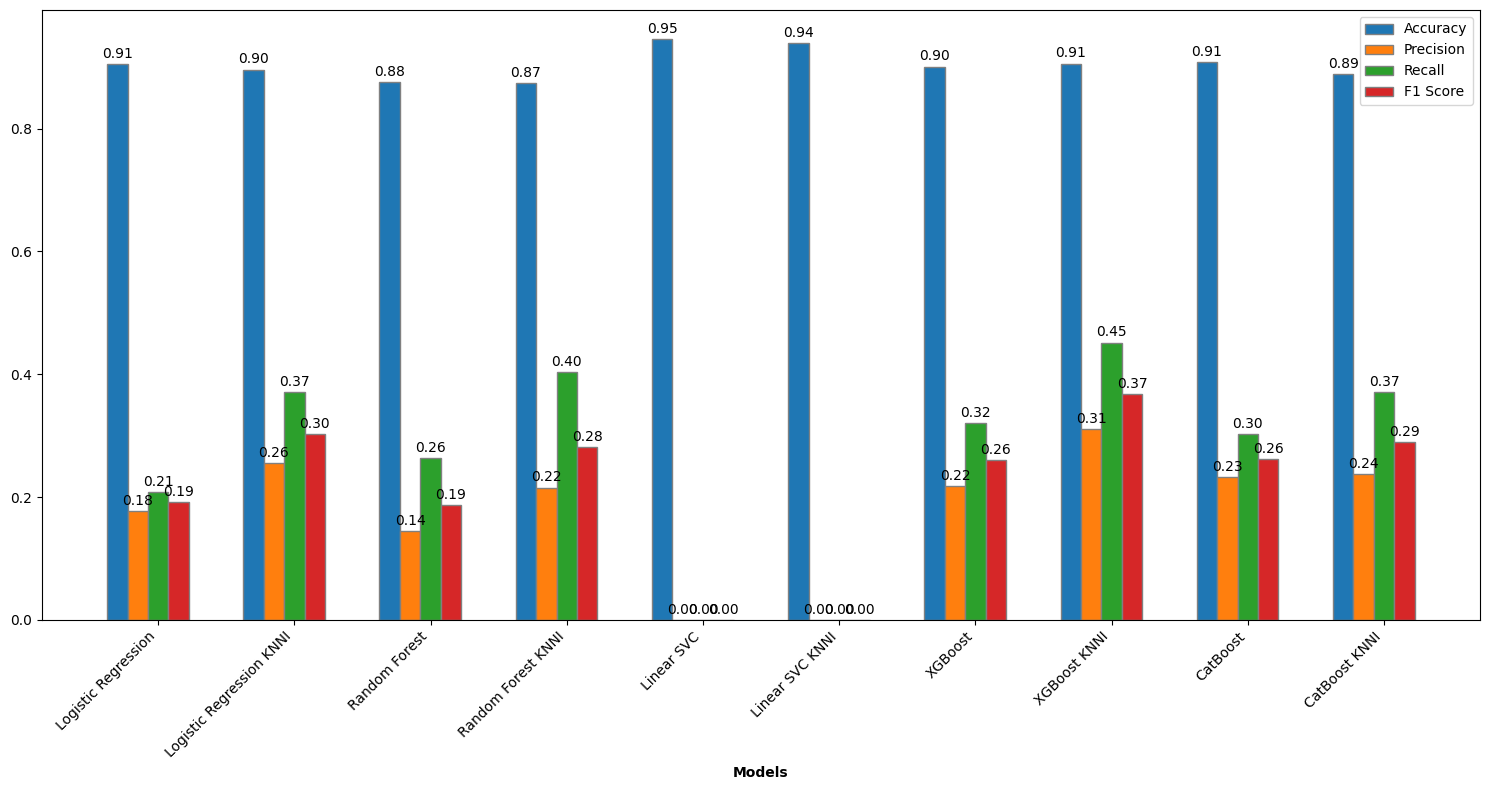

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Logistic Regression KNNI', 
          'Random Forest', 'Random Forest KNNI', 
          'Linear SVC', 'Linear SVC KNNI',
          'XGBoost', 'XGBoost KNNI',
          'CatBoost', 'CatBoost KNNI']

# Metrics for each model
accuracy = [accuracy_logistic, accuracy1_logistic_KNNI,
            accuracy_RandomForest, accuracy_RandomForest_KNNI,
            accuracy_LinearSVC, accuracy1_LinearSVC_KNNI,
            accuracy_XGBoost, accuracy_XGBoost_KNNI,
            accuracy_CatBoost, accuracy_CatBoost_KNNI]

precision = [precision_logistic, precision1_logistic_KNNI,
              precision_RandomForest, precision_RandomForest_KNNI,
              precision_LinearSVC, precision1_LinearSVC_KNNI,
              precision_XGBoost, precision_XGBoost_KNNI,
              precision_CatBoost, precision_CatBoost_KNNI]

recall = [recall_logistic, recall1_logistic_KNNI,
          recall_RandomForest, recall_RandomForest_KNNI,
          recall_LinearSVC, recall1_LinearSVC_KNNI,
          recall_XGBoost, recall_XGBoost_KNNI,
          recall_CatBoost, recall_CatBoost_KNNI]

f1 = [f1_logistic, f1_1_logistic_KNNI,
      f1_RandomForest, f1_RandomForest_KNNI,
      f1_LinearSVC, f1_1_LinearSVC_KNNI,
      f1_XGBoost, f1_XGBoost_KNNI,
      f1_CatBoost, f1_CatBoost_KNNI]

# Bar width
bar_width = 0.15

# Set up the bar positions
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create bar plots
fig, ax = plt.subplots(figsize=(15, 8))  
ax.bar(r1, accuracy, width=bar_width, edgecolor='grey', label='Accuracy')
ax.bar(r2, precision, width=bar_width, edgecolor='grey', label='Precision')
ax.bar(r3, recall, width=bar_width, edgecolor='grey', label='Recall')
ax.bar(r4, f1, width=bar_width, edgecolor='grey', label='F1 Score')

# Add metric values at the top of each bar
for r, acc, prec, rec, f1_val in zip(r1, accuracy, precision, recall, f1):
    ax.text(r, acc + 0.01, f'{acc:.2f}', ha='center')
    ax.text(r + bar_width, prec + 0.01, f'{prec:.2f}', ha='center')
    ax.text(r + 2*bar_width, rec + 0.01, f'{rec:.2f}', ha='center')
    ax.text(r + 3*bar_width, f1_val + 0.01, f'{f1_val:.2f}', ha='center')

# Add x-axis labels and legend
ax.set_xlabel('Models', fontweight='bold')
ax.set_xticks([r + 2*bar_width for r in range(len(models))])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
"""In conclusion i could say that KNNI datasets performs better, even if they lose in ~0.01 accuracy, they have higher all others marks,
    and LinearSVC even if i played with threshold it doesnt find any stroke=1, and because of very little stroke positive cases in dataset it
    has a high accuracy."""